<a href="https://colab.research.google.com/github/jasmeen2105/Jasmeen/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [42]:
!pip install kaggle

In [43]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [44]:
import zipfile

# Unzip the file
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall('/content/cat-and-dog/') # Extract to a new directory

# Update data_path to the extracted directory
data_path = '/content/cat-and-dog/'

IsADirectoryError: [Errno 21] Is a directory: '/content/cat-and-dog/'

In [45]:
# Define ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [46]:
# Load train and validation datasets
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [47]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 486ms/step - accuracy: 0.7645 - loss: 0.5800 - val_accuracy: 0.7984 - val_loss: 0.5046
Epoch 2/5
  1/250 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.7812 - loss: 0.5312

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7812 - loss: 0.5312 - val_accuracy: 0.7979 - val_loss: 0.5058
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 331ms/step - accuracy: 0.8001 - loss: 0.5046 - val_accuracy: 0.7979 - val_loss: 0.5157
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.7812 - loss: 0.5322 - val_accuracy: 0.7999 - val_loss: 0.5137
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 290ms/step - accuracy: 0.7968 - loss: 0.5081 - val_accuracy: 0.7999 - val_loss: 0.5009


In [50]:
# Save the trained model
model.save('/content/cat_dog_classifier.h5')


In [51]:
# Load model and test with a new image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/cat_dog_classifier.h5')


In [56]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return 'Dog' if prediction > 0.5 else 'Cat'

In [60]:
# Test with an image
img_path = '/content/cat-and-dog/test_set/test_set/cats/cat.4012.jpg' # Update this path
result = predict_image(img_path)
print(f'Predicted Class: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: Dog


In [58]:
history.history['accuracy']

[0.7932674288749695, 0.78125, 0.7982730865478516, 0.78125, 0.7978976368904114]

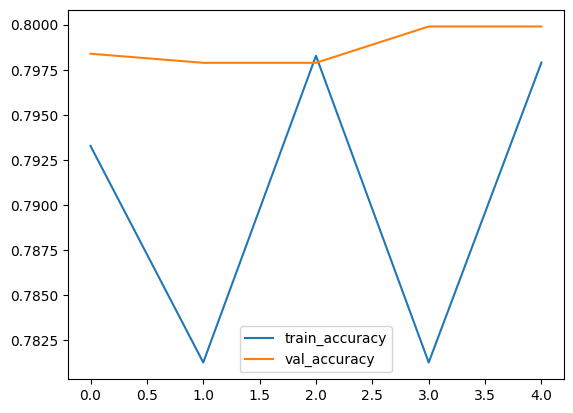

In [62]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
